# Diabetes Prediction using Machine Learning

## Introduction

Diabetes is a collection of metabolic diseases characterised by persistently elevated blood sugar levels. Increased thirst, increased hunger, and frequent urine are signs of elevated blood sugar. Diabetes can result in a number of consequences if it is not addressed. Diabetic ketoacidosis, hyperosmolar hyperglycemia, or even mortality are examples of acute complications. Cardiovascular illness, stroke, chronic kidney disease, foot ulcers, and eye impairment are examples of serious long-term consequences.

Based on specific diagnostic metrics included in the collection, the dataset aims to diagnostically predict the presence or absence of diabetes in a patient. These examples were chosen from a bigger database under a number of restrictions.

## Features

1.Diabetes_binary:- Target Column.
    0 = no diabetes
   1 = prediabetes and diabetes
   
2.HighBP:-
     0 = no high BP 
    1 = high BP 
    
3.HighChol:-
    0 = no high cholesterol 
    1 = high cholesterol 
    
4.CholCheck:-
   0 = no cholesterol check in 5 years, 
   1 = yes cholesterol check in 5 years  
   
5.Body Mass Index.

6.Smoker:-Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 
   0 = no, 
   1 = yes    
   
7.Stroke:-(Ever told) you had a stroke. 
    0 = no, 
    1 = yes
    
8.HeartDiseaseorAttack:-Coronary Heart Disease (CHD) or Myocardial Infarction (MI) 
    0 = no, 
    1 = yes
    
9.PhysActivity:-Physical activity in past 30 days - not including job 
    0 = no, 
    1 = yes
    
10.Fruits:-Consume Fruit 1 or more per day 
    0 = no, 
    1 = yes
    
11.Veggies:-Consume Vegetables 1 or more per day 
    0 = no, 
    1 = yes
    
12.HvyAlcoholConsump:- Heavy drinkers (adult men having more than 14 drinks per week and adult women having 
                      more than 7 drinks per week) 
    0 = no,
    1 = yes
    
13.AnyHealthcare:- Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 
    0 = no, 
    1 = yes
    
14.NoDocbcCost:- Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 
    0 = no, 
    1 = yes
    
15.GenHlth:-Would you say that in general your health is: scale 1-5: 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor


16.MentHlth:-Now thinking about your mental health, which includes stress, depression, and problems with emotions, 
         for how many days during the past 30 days was your mental health not good? It is in days, scale will be between 0-30
         
17.PhysHlth:-Now thinking about your physical health, which includes physical illness and injury, for how many 
            days during the past 30 days was your physical health not good? It is in days, scale will be between 0-30
            
18.DiffWalk:- Do you have serious difficulty walking or climbing stairs? 
    0 = no, 
    1 = yes
    
19.Sex:- 
    0 = female, 
    1 = male
    
20.Age:- 13-level age category (_AGEG5YR see codebook21 linked above): scale 1-13: 1 = 18-24, 8 = 55-59, 13 = 80 or older
        Education
        
21.Education level: scale 1-6: 1 = Never attended school or only kindergarten 2 = Grades 1 through 8

22.Income:- Income scale (INCOME3 see codebook21 linked above): scale 1-8: 1 = less than $10,000 5 = less than 
            $35,000 11 = $200,000 or more

## Exploratory Data Analysis

In [4]:
# Regular EDA and plotting libraries
import pandas as pd # pandas is so commonly used, it's shortened to pd
import numpy as np # np is short for numpy
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action = "ignore")

### Load Data

In [5]:
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2021.csv')

In [6]:
# Let's check the top 5 rows of our dataframe
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [7]:
# Let's check the bottom 5 rows of our dataframe
data.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
236373,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0
236377,0.0,0,1.0,1,32.0,0.0,0.0,0.0,1,0,...,1,0.0,1.0,2.0,2.0,0.0,0,6,6.0,6.0


In [8]:
data.shape

(236378, 22)

In [9]:
## Display number of rows, columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [10]:
#Finding the mean, min, max, and std deviation
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.142010,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,...,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.349061,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,...,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [11]:
# find out how many null values are present
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
# Let's see how many positive (1) and negative (0) samples we have in our datafram
data.Diabetes_binary.value_counts()

0.0    202810
1.0     33568
Name: Diabetes_binary, dtype: int64

In [13]:
# Normalized value counts
data.Diabetes_binary.value_counts(normalize = True)

0.0    0.85799
1.0    0.14201
Name: Diabetes_binary, dtype: float64

<Axes: >

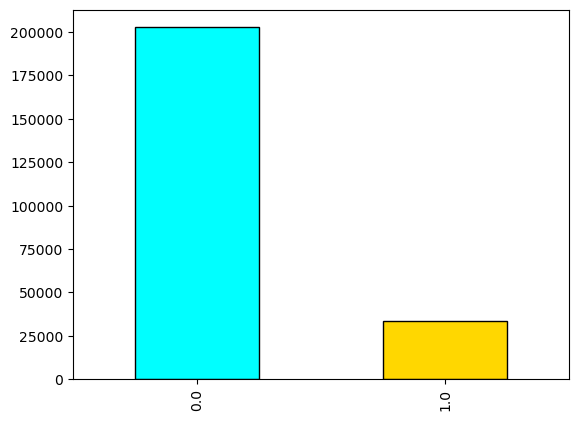

In [14]:
# Plot the value counts with a bar graph
data.Diabetes_binary.value_counts().plot(kind = 'bar',color =["aqua","gold"], edgecolor = 'black')

### Disease frequency according to gender

In [15]:
data.Sex.value_counts()

0    123431
1    112947
Name: Sex, dtype: int64

In [16]:
# Compare target column with sex column
pd.crosstab(data.Diabetes_binary , data.Sex)

Sex,0,1
Diabetes_binary,,
0.0,107328,95482
1.0,16103,17465


<Axes: xlabel='Diabetes_binary'>

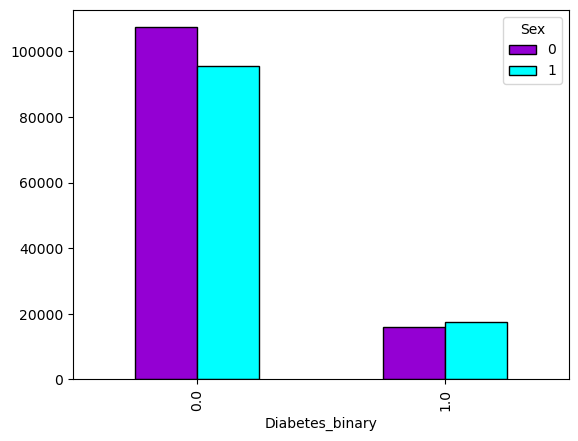

In [17]:
# Create a plot
pd.crosstab(data.Diabetes_binary , data.Sex).plot(kind = 'bar', color = ["darkviolet", "aqua"], edgecolor = 'black')

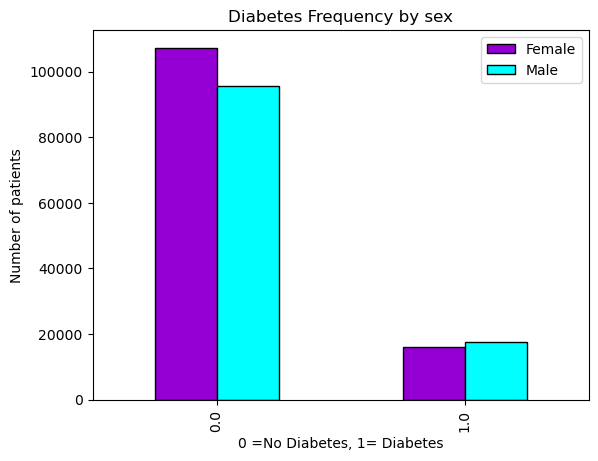

In [18]:
pd.crosstab(data.Diabetes_binary , data.Sex).plot(kind = 'bar', color = ["darkviolet", "aqua"], edgecolor = 'black')
plt.title('Diabetes Frequency by sex')
plt.xlabel('0 =No Diabetes, 1= Diabetes')
plt.ylabel('Number of patients')
plt.legend(["Female", "Male"])

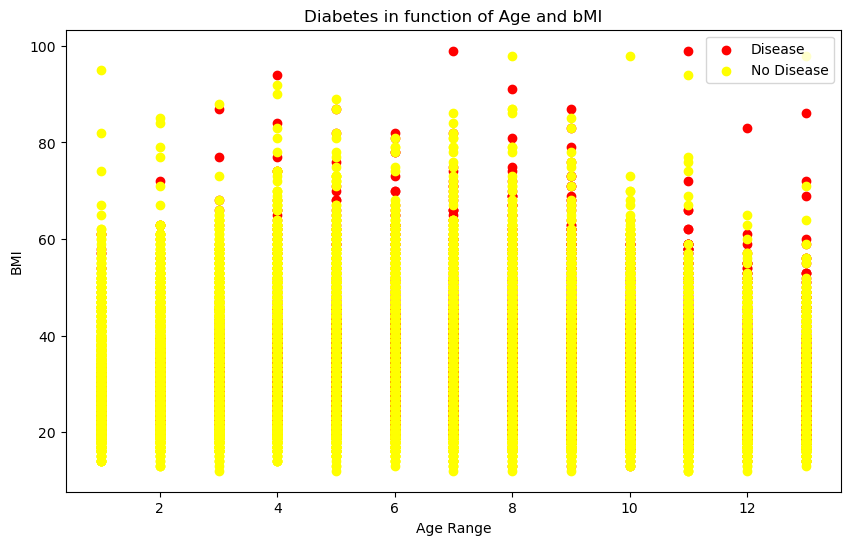

In [19]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(data.Age[data.Diabetes_binary==1], 
            data.BMI[data.Diabetes_binary==1], 
            c="red") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(data.Age[data.Diabetes_binary==0], 
            data.BMI[data.Diabetes_binary==0], 
            c="yellow") # axis always come as (x, y)

# Add some helpful info
plt.title("Diabetes in function of Age and bMI")
plt.xlabel("Age Range")
plt.legend(["Disease", "No Disease"])
plt.ylabel("BMI");

In [20]:
# Find the correlation between our independent variables
corr_matrix = data.corr()
corr_matrix

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.260338,0.197046,0.068585,0.200783,0.056982,0.101557,0.175338,-0.147951,-0.028694,...,0.027671,0.013320,0.278851,0.036099,0.160067,0.209561,0.034585,0.190946,-0.102297,-0.151469
HighBP,0.260338,1.000000,0.283285,0.099415,0.213951,0.099570,0.126594,0.203191,-0.132253,-0.031542,...,0.049833,-0.007477,0.281555,0.011743,0.140946,0.208262,0.067557,0.345390,-0.106342,-0.150292
HighChol,0.197046,0.283285,1.000000,0.098558,0.087188,0.082402,0.085947,0.170668,-0.076648,-0.024408,...,0.056505,-0.012307,0.187101,0.019851,0.104846,0.127667,0.029081,0.287937,-0.035434,-0.068196
CholCheck,0.068585,0.099415,0.098558,1.000000,0.036226,-0.012874,0.025386,0.043867,-0.008454,0.024951,...,0.154640,-0.071406,0.042176,-0.015560,0.031339,0.044966,-0.048143,0.102707,0.030341,0.021765
BMI,0.200783,0.213951,0.087188,0.036226,1.000000,0.016289,0.010241,0.039518,-0.163979,-0.089897,...,-0.009609,0.048165,0.254835,0.088455,0.120976,0.199165,0.007928,-0.050161,-0.098964,-0.102487
Smoker,0.056982,0.099570,0.082402,-0.012874,0.016289,1.000000,0.057064,0.111283,-0.093729,-0.071277,...,-0.023686,0.046932,0.166432,0.084626,0.113428,0.123640,0.073719,0.123354,-0.178179,-0.148127
Stroke,0.101557,0.126594,0.085947,0.025386,0.010241,0.057064,1.000000,0.177667,-0.078759,-0.000428,...,0.015463,0.021849,0.159723,0.045176,0.131955,0.162562,0.001288,0.128892,-0.061672,-0.115004
HeartDiseaseorAttack,0.175338,0.203191,0.170668,0.043867,0.039518,0.111283,0.177667,1.000000,-0.097710,-0.006846,...,0.025104,0.014479,0.239646,0.034660,0.170468,0.194299,0.085596,0.223501,-0.080808,-0.124740
PhysActivity,-0.147951,-0.132253,-0.076648,-0.008454,-0.163979,-0.093729,-0.078759,-0.097710,1.000000,0.118245,...,0.024926,-0.050100,-0.284207,-0.116034,-0.248385,-0.284294,0.058629,-0.119369,0.211932,0.239828
Fruits,-0.028694,-0.031542,-0.024408,0.024951,-0.089897,-0.071277,-0.000428,-0.006846,0.118245,1.000000,...,0.019495,-0.029629,-0.082256,-0.058411,-0.032673,-0.029691,-0.053992,0.071838,0.087289,0.053229


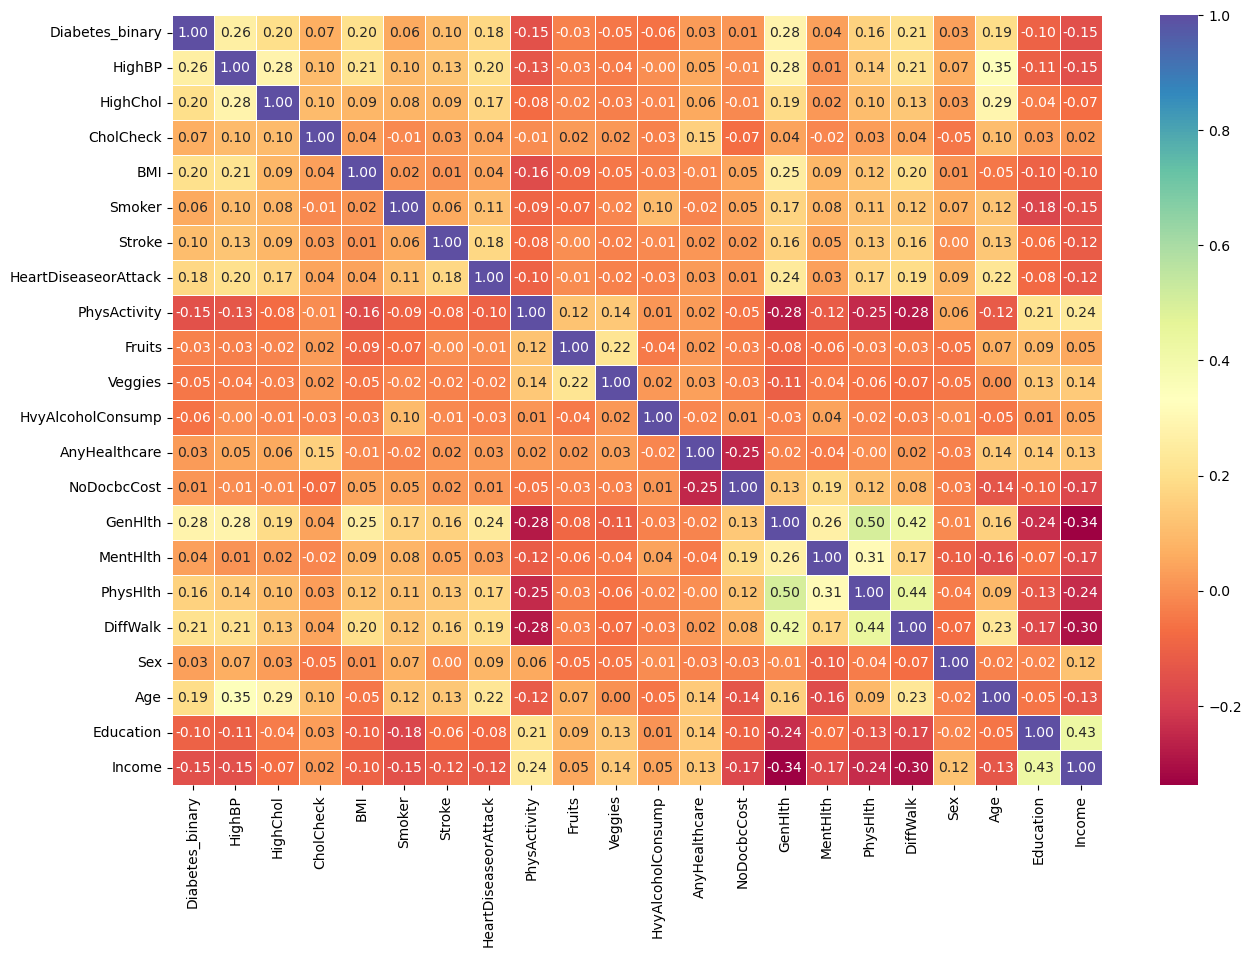

In [21]:
# Let's plot a heatmap
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="Spectral");

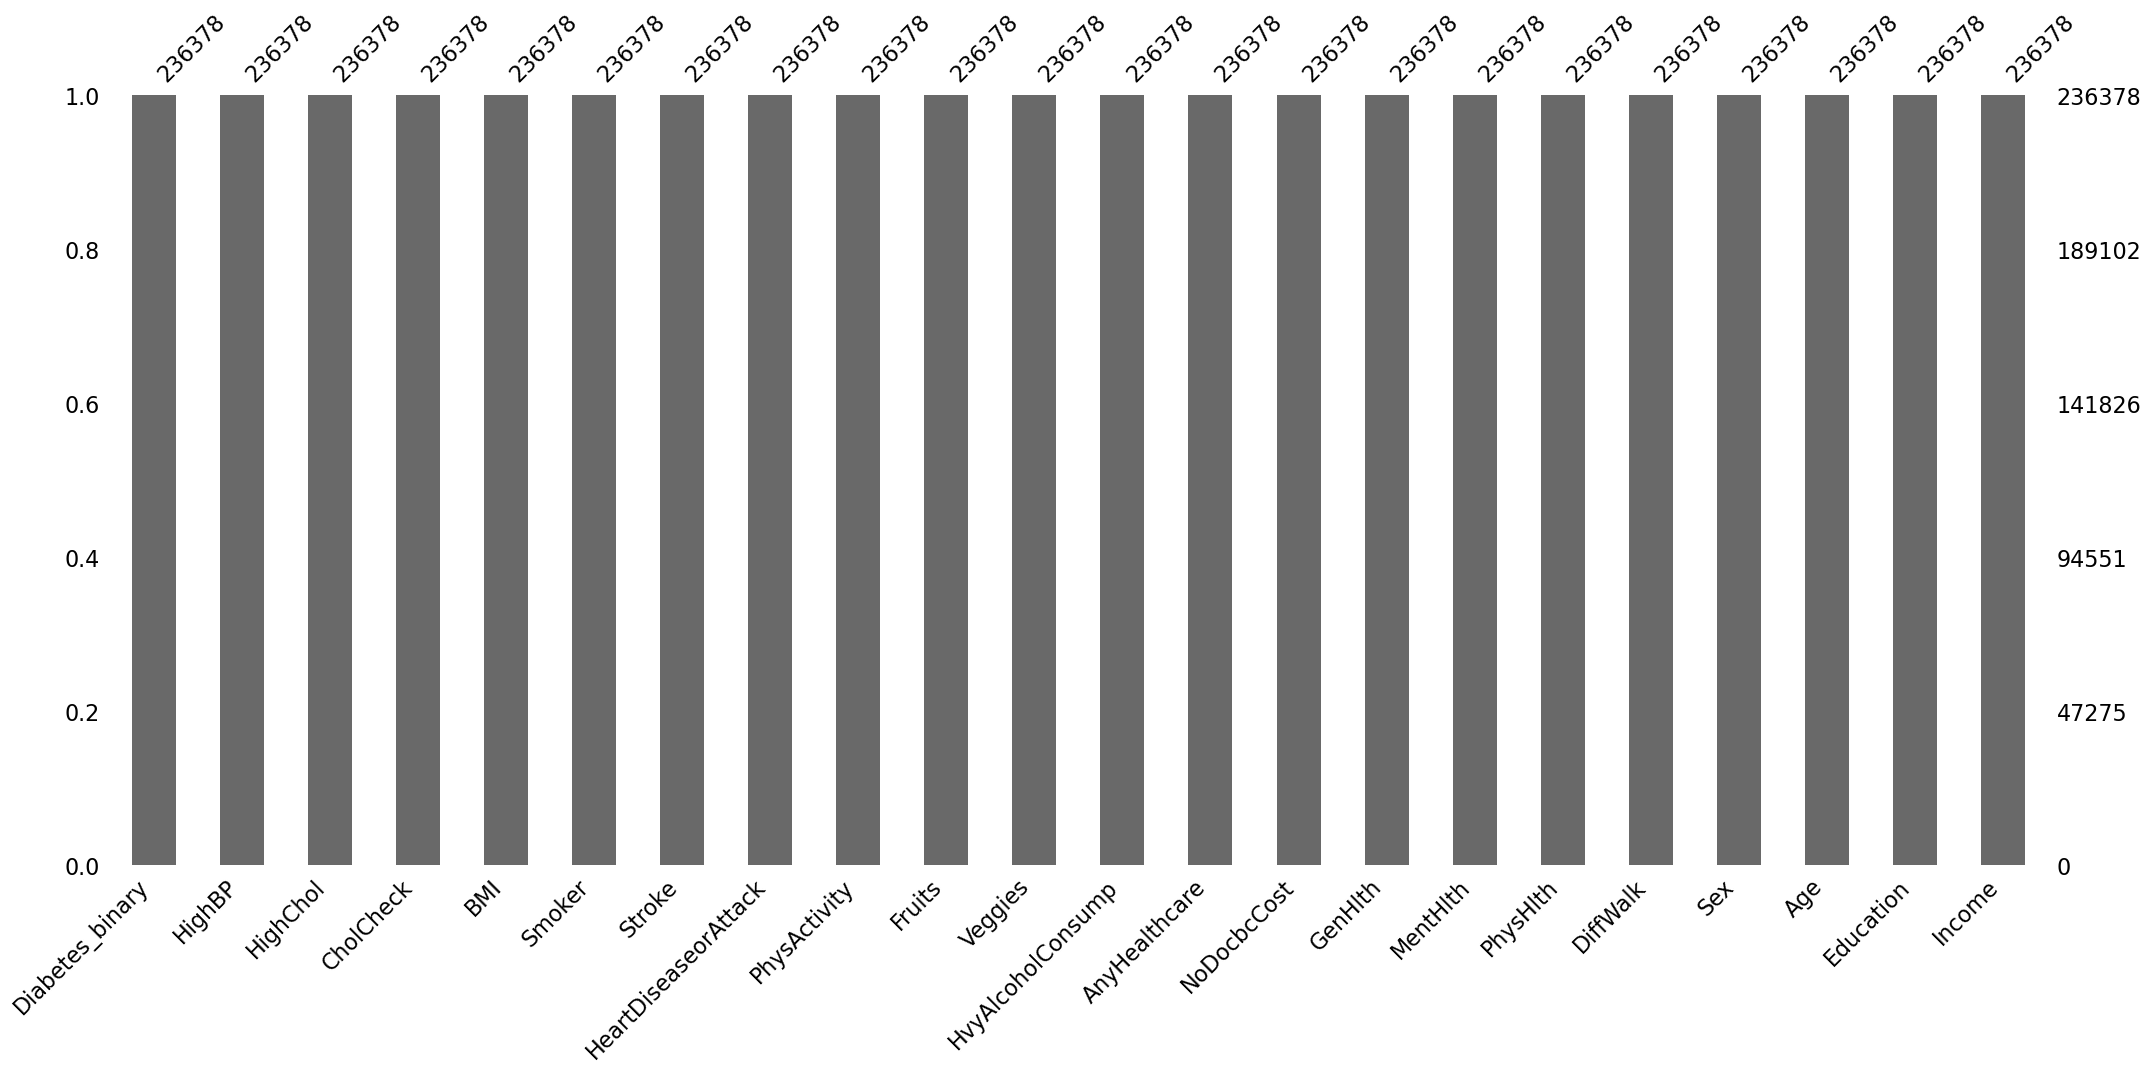

In [22]:
# Checking for missing values
import missingno as msno
msno.bar(data);

## Splitting the data (Test_Train split)

In [23]:
X = data.drop(columns = 'Diabetes_binary')
Y = data['Diabetes_binary']

In [24]:
#splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

In [25]:
# count the number rows and columns for x_train
X_train.shape

(165464, 21)

In [26]:
# count the number rows and columns for x_test
X_test.shape

(70914, 21)

In [27]:
# count the number rows for y_train
Y_train.shape

(165464,)

In [28]:
# count the number rows for y_test
Y_test.shape

(70914,)

## Logistic Regression Classifier

In [29]:
#Fit the values in algorithm
log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_train , Y_train)

LogisticRegression(max_iter=10000)

In [30]:
#prediction
lg_pred = log_reg.predict(X_test)
lg_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
# Calculate accuracy score
print("Logistic Regression Training set:", log_reg.score(X_train, Y_train))
print("Logistic Regression Testing set:", log_reg.score(X_test, Y_test))
lin_reg_Accuracy_Score = accuracy_score(Y_test, lg_pred)
print(lin_reg_Accuracy_Score)

Logistic Regression Training set: 0.862006237006237
Logistic Regression Testing set: 0.8595340835378064
0.8595340835378064


## Decision Tree Classifier

In [32]:
#Fit the values in  algorithm
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [33]:
#prediction
dt_pred = dec_tree.predict(X_test)
dt_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
print("decision tree training set:",dec_tree.score(X_train, Y_train))
print("decision tree testing set:",dec_tree.score(X_test, Y_test))
dec_tree_accuracy_score = accuracy_score(Y_test, dt_pred)
print(dec_tree_accuracy_score)

decision tree training set: 0.9956727747425422
decision tree testing set: 0.7895902078574047
0.7895902078574047


## Random Forest Classifier

In [35]:
#Fit the values in algorithm
ran_for = RandomForestClassifier()
ran_for.fit(X_train, Y_train)

RandomForestClassifier()

In [36]:
#prediction
rf_pred = ran_for.predict(X_test)
rf_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
# Calculate accuracy score
print("random forest training set:",ran_for.score(X_train, Y_train))
print("random forest testingset:",ran_for.score(X_test, Y_test))
ran_for_accuracy_score = accuracy_score(Y_test, rf_pred)
print(ran_for_accuracy_score)

random forest training set: 0.9956304694676787
random forest testingset: 0.8542459880982599
0.8542459880982599


## KNN Classifier

In [38]:
#Fit the values in algorithm
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [39]:
#prediction
knn_pred = knn.predict(X_test)
knn_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
# calculate accuracy score
print("knn training set", knn.score(X_train, Y_train))
print("knn testing set:", knn.score(X_test, Y_test))
knn_accuracy_score = accuracy_score(Y_test, knn_pred)
print(knn_accuracy_score)

knn training set 0.8815270995503554
knn testing set: 0.8412302225230561
0.8412302225230561


In [41]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']
scores = [lin_reg_Accuracy_Score, dec_tree_accuracy_score, ran_for_accuracy_score, knn_accuracy_score]
models = pd.DataFrame({'Models' : models , 'Scores': scores})
models.sort_values(by = 'Scores', ascending = False)
                      

,Models,Scores
0,Logistic Regression,0.859534
2,Random Forest,0.854246
3,KNN,0.841230
1,Decision Tree,0.789590


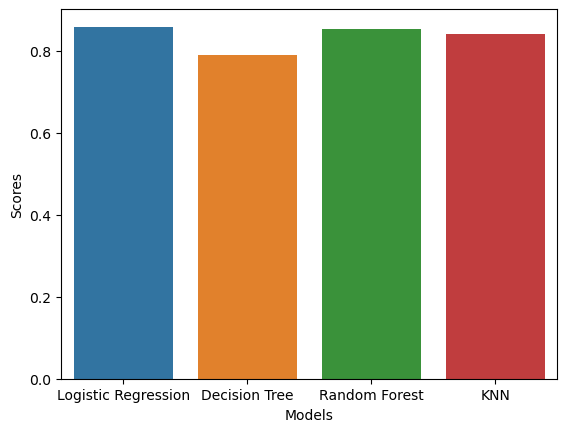

In [42]:
sns.barplot(x = 'Models', y = 'Scores', data = models)
plt.show()

Because Logistic Regression and Random Forest gives the higher accuracy we will perform hyperparameter tuning on them.

## Hyperparameter tuning and cross-validation

### Tuning Model with RandomizedSearchCV

In [43]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [45]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [48]:
rs_log_reg.score(X_test, Y_test)

0.8595904898891615

### Tuning model with GridsearchCV

In [53]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [54]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [56]:
# Evaluate the model
gs_log_reg.score(X_test, Y_test)

0.8595904898891615

### Evaluating a classsification Model

In [57]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [58]:
y_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [59]:
Y_test

94457     0.0
192177    0.0
64378     0.0
98606     0.0
74676     1.0
         ... 
230694    0.0
127205    0.0
121272    0.0
36104     0.0
145876    0.0
Name: Diabetes_binary, Length: 70914, dtype: float64

In [61]:
# Display confusion matrix
print(confusion_matrix(Y_test, y_preds))

[[59494  1327]
 [ 8630  1463]]


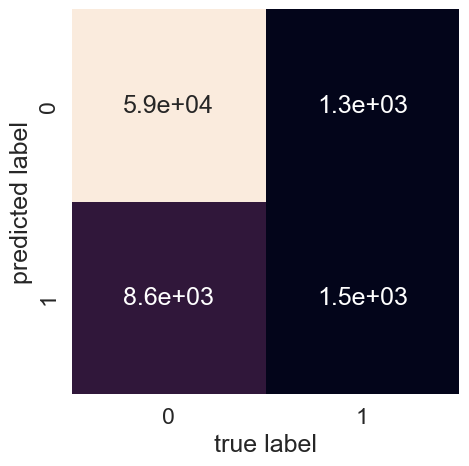

In [64]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(Y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(Y_test, y_preds)

In [66]:
# Show classification report
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     60821
         1.0       0.52      0.14      0.23     10093

    accuracy                           0.86     70914
   macro avg       0.70      0.56      0.57     70914
weighted avg       0.82      0.86      0.82     70914



In [67]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

### Cross Validation

In [68]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [70]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.86198071, 0.86054235, 0.86147305, 0.86068747, 0.86185087])

In [71]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8613068894929331

We can see the slight increase in accuracy score

## Conclusion

After feature selection we used four machine learning models and achieved quite good accuracy of approx. 87% for logistic classifier model for predicting the diabetes disease.